# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [118]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [119]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []  
    
    # Функция добавления ребра в список смежности
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
    
    # Функция для вывода расстояний от источника до каждой вершины
    def printArr(self, dist):
        print("Расстояние вершины от источника")
        for i in range(self.V):
            if dist[i] == float('inf'):
                print("% d \t\t %s" % (i, "0"))
            else:
                print("% d \t\t % d" % (i, dist[i]))
    
    # Алгоритм Беллмана-Форда для поиска кратчайших путей от источника до всех остальных вершин в графе.
    def BellmanFord(self, src):
        dist = [float("inf")] * self.V
        dist[src] = 0
        for i in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
        return dist

    def dijkstra(self, src):
        dist = [float("inf")] * self.V
        dist[src] = 0
        spt_set = [False] * self.V

        for _ in range(self.V):
            u = self.min_distance(dist, spt_set)
            spt_set[u] = True
            for v in range(self.V):
                if (
                    self.graph[u][v] > 0
                    and not spt_set[v]
                    and dist[v] > dist[u] + self.graph[u][v]
                ):
                    dist[v] = dist[u] + self.graph[u][v]
        return dist
    
    def get_neighbors(self, node):
        # Возвращает список соседей данной вершины
        neighbors = []
        for edge in self.graph:
            if edge[0] == node:
                neighbors.append((edge[1], edge[2]))
        return neighbors

        # Алгоритм Флойда-Уоршелла
    def floydWarshall(self):
        dist = [[float('inf')] * self.V for _ in range(self.V)]

        # Initialize the distance matrix with the weights of the edges
        for u, v, w in self.graph:
            dist[u][v] = w

        # Floyd-Warshall algorithm
        for k in range(self.V):
            for i in range(self.V):
                for j in range(self.V):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

        # Print the shortest distances
        return dist[0]
    
    # Алгоритм Джонсона
    def Johnson(self):
        # Add a new vertex with edges to all other vertices with weight 0
        self.V += 1
        for v in range(self.V - 1):
            self.graph.append([self.V - 1, v, 0])
        
        # Run Bellman-Ford algorithm to get the shortest distances from the newly added vertex
        h = self.BellmanFord(self.V - 1)
        
        # Update the edge weights in the graph using the computed distances
        for u, v, w in self.graph:
            if h[u] != float('inf'):
                self.graph.append([u, v, w + h[u] - h[v]])
        
        # Initialize an empty list to store the final shortest distances
        shortest_dists = []
        
        # Run Dijkstra's algorithm from each vertex to get the shortest distances
        for src in range(self.V - 1):
            # Run Dijkstra's algorithm from the current source vertex
            dist = self.dijkstra(src)
            
            # Update the distances using the computed values of h
            for i in range(len(dist)):
                if dist[i] != float('inf'):
                    dist[i] += h[i] - h[src]
            
            # Append the updated distances to the list of shortest distances
            shortest_dists.append(dist[:-1])  # Exclude the distance from the added vertex
            
        # Return the list of shortest distances
        return shortest_dists

    
    def levitAlgorithm(graph, src):
        results = []
        dist = [float('inf')] * graph.V
        dist[src] = 0
        first_layer = [src]
        second_layer = []
        third_layer = []
        in_queue = [False] * graph.V
        in_queue[src] = True
        processed = [False] * graph.V
        
        while first_layer or second_layer or third_layer:
            while first_layer:
                u = first_layer.pop(0)
                in_queue[u] = False
                processed[u] = True
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                second_layer.append(v)
            
            while second_layer:
                u = second_layer.pop(0)
                in_queue[u] = False
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                if v not in third_layer:
                                    third_layer.append(v)
            
            while third_layer:
                u = third_layer.pop(0)
                in_queue[u] = False
                processed[u] = True
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                if v not in second_layer and v not in third_layer:
                                    second_layer.append(v)
            
            # Check for negative cycles
            if not first_layer and not second_layer and not third_layer:
                for edge in graph.graph:
                    u = edge[0]
                    v = edge[1]
                    w = edge[2]
                    if dist[v] > dist[u] + w and processed[u]:
                        print("Graph contains negative cycle.")
                        return
        
        graph.printArr(dist)
    
     # Функция для выполнения Yen's алгоритма
    def yenAlgorithm(self, src):
        # Импорт модуля heapq для реализации приоритетной очереди
        import heapq
        
        # Создаем список для хранения результатов
        results = []
        
        # Создаем список расстояний и инициализируем его значением бесконечности
        dist = [float('inf')] * self.V
        
        # Устанавливаем расстояние от исходной вершины до самой себя равным 0
        dist[src] = 0
        
        # Создаем очередь с приоритетом для обработки вершин
        pq = [(0, src)]
        
        # Пока очередь не пуста
        while pq:
            # Извлекаем вершину с наименьшим расстоянием
            (d, u) = heapq.heappop(pq)
            
            # Для каждого ребра из текущей вершины
            for edge in self.graph:
                if edge[0] == u:
                    v = edge[1]
                    w = edge[2]
                    
                    # Если найденное расстояние до вершины v меньше, чем текущее известное расстояние
                    if dist[v] > dist[u] + w:
                        # Обновляем расстояние
                        dist[v] = dist[u] + w
                        
                        # Добавляем вершину v в очередь с приоритетом
                        heapq.heappush(pq, (dist[v], v))
        
        # Выводим результаты с использованием printArr
        return dist

In [120]:
st = open("graf.txt")

n = int(st.readline())
m = int(st.readline())
graph = Graph(n)
G = nx.DiGraph()
print(n,m)
for f in range(m):
    u, v, w = tuple(map(int, st.readline().split()))
    print(u,v,w)
    graph.addEdge(u, v, w)
    G.add_edge(u, v, weight = w)

'''
n = int(input("Количество вершин: "))
m = int(input("Количество ребер: "))
'''
graph = Graph(n)
G = nx.DiGraph()


    

5 8
0 1 -1
0 2 4
1 2 3
1 3 2
1 4 2
3 2 5
3 1 1
4 3 -3


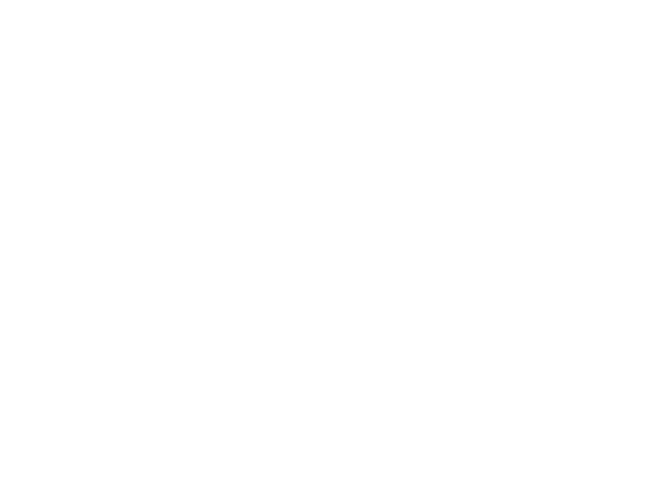

In [121]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [122]:
g = graph

print("Bellman-Ford algorithm:")
g.printArr(g.BellmanFord(0))

Bellman-Ford algorithm:
Расстояние вершины от источника
 0 		  0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


In [123]:
g = graph

print("d algorithm:")
g.printArr(g.dijkstra(0))

d algorithm:


AttributeError: 'Graph' object has no attribute 'min_distance'

In [ ]:
g = graph

print("f algorithm:")
g.printArr(g.floydWarshall())

f algorithm:
Расстояние вершины от источника
 0 		 0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


In [ ]:
g = graph

print("j algorithm:")
g.printArr(g.Johnson())

j algorithm:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/youngflexxxer/Documents/лабы/siaod/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6f/m50jdlyj1hq70x62d2ygdn_r0000gn/T/ipykernel_11588/243217980.py", line 4, in <module>
    g.printArr(g.Johnson())
               ^^^^^^^^^^^
  File "/var/folders/6f/m50jdlyj1hq70x62d2ygdn_r0000gn/T/ipykernel_11588/2553939069.py", line -1, in Johnson
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/youngflexxxer/Documents/лабы/siaod/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/youngflexxxer/Documents/лабы/siaod/.venv/lib/python3.11/site-packages/IPython/core/ultratb.py", line 1310, i

In [ ]:
g = graph

print("l algorithm:")
g.levitAlgorithm(0)

l algorithm:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1


In [ ]:
g = graph

g.printArr(g.yenAlgorithm(0))

Расстояние вершины от источника
 0 		  0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


к-во вершин=5
к-во ребер=8
0-е ребро: 0 1 -1
1-е ребро: 0 2 4
2-е ребро: 1 2 3
3-е ребро: 1 3 2
4-е ребро: 1 4 2
5-е ребро: 3 2 5
6-е ребро: 3 1 1
7-е ребро: 4 3 -3

### Вывод